## What are the most in-demand skills for the top 3 most popular data jobs in the US?

### Methodology:
1. Clean skill column
2. Calculate skill count based on **job_title_short**
3. Calculate skill percentage
4. Ploy final findings

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)

In [3]:
df_US = df[df['job_country'] == 'United States'].copy()

In [6]:
df_US_skills = df_US.explode('job_skills')
df_US_skills[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab


In [16]:
df_skills_count = df_US_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)
df_skills_count.head()

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022


In [23]:
job_titles = df_US['job_title_short'].value_counts().head(3).index.to_list()
job_titles= sorted(job_titles)
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

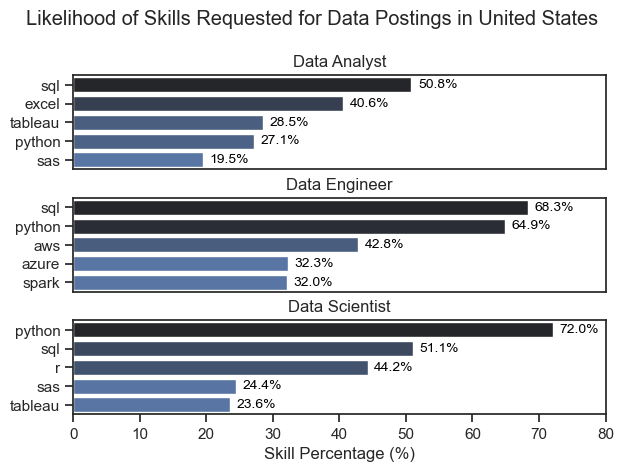

In [60]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_job_skills = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_job_skills['skill_percentage'] = df_job_skills['skill_count'] / len(df_US[df_US['job_title_short'] == job_title]) * 100
    sns.barplot(data=df_job_skills, x='skill_percentage', y='job_skills', ax=ax[i], hue='skill_percentage', palette='dark:b_r')
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(f'{job_title}')
    ax[i].set_xlim(0, 80)
    ax[2].set_xlabel('Skill Percentage (%)')
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    for n, v in enumerate(df_job_skills['skill_percentage']):
        ax[i].text(v + 1 , n, f'{v:0.1f}%', color='black', va='center', fontsize=10)


plt.suptitle('Likelihood of Skills Requested for Data Postings in United States')
plt.tight_layout(h_pad=0.5)
plt.show()